In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 


data = pd.read_csv('sunspot.txt',  header=None, delim_whitespace=True)
del data[0] ## Deletes the "year" column
#data = data.rename(columns={1: 'jan', 2: 'feb', 3: 'mar', 4:'apr',
                     #5:'may', 6:'june', 7:'july', 8:'aug',
                     #9:'sept', 10:'oct', 11:'nov', 12:'dec'})
data = data.sort_index(ascending=True)
data.head()

,1,2,3,4,5,6,7,8,9,10,11,12
0,58.0,62.6,70.0,55.7,85.0,83.5,94.8,66.3,75.9,75.5,158.6,85.2
1,73.3,75.9,89.2,88.3,90.0,100.0,85.4,103.0,91.2,65.7,63.3,75.4
2,70.0,43.5,45.3,56.4,60.7,50.7,66.3,59.8,23.5,23.2,28.5,44.0
3,35.0,50.0,71.0,59.3,59.7,39.6,78.4,29.3,27.1,46.6,37.6,40.0
4,44.0,32.0,45.7,38.0,36.0,31.7,22.0,39.0,28.0,25.0,20.0,6.7


In [2]:
label_index = 0
i = 1
j = 9

labels_array = np.array([])

while i < 266:
    labels_array = np.append(labels_array,data.iloc[i][j].tolist())
    label_index+=1
    j+=1
    if(j>12):
        j=1
        i+=1

labels_full = pd.DataFrame(labels_array)
print(labels_full.shape)
labels_full.head()

(3172, 1)


,0
0,91.2
1,65.7
2,63.3
3,75.4
4,70.0


In [3]:
i = 0
j = 1
i_start = 0
j_start = 1
count_r = 0
count_c = 0
data_test_set = []

while count_r < 3172:
    data_row = np.array([])
    count_c = 0
    j = j_start
    i = i_start
    
    while count_c < 20:
        count_c+=1
        data_row = np.append(data_row, data.iloc[i][j].tolist())
        j+=1
        if(j>12):
            j=1
            i+=1
            
    j_start+=1
    if j_start > 12:
        j_start = 1
        i_start+=1
    data_test_set.append(data_row)
    count_r+=1
    
data_full_df = pd.DataFrame(data_test_set)

In [4]:
columns = data_full_df.columns.tolist()
columns = columns[::-1]
data_full_df = data_full_df[columns]
data_full_df.columns = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
print(data_full_df.shape)
data_full_df.head()

(3172, 20)


,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
0,103.0,85.4,100.0,90.0,88.3,89.2,75.9,73.3,85.2,158.6,75.5,75.9,66.3,94.8,83.5,85.0,55.7,70.0,62.6,58.0
1,91.2,103.0,85.4,100.0,90.0,88.3,89.2,75.9,73.3,85.2,158.6,75.5,75.9,66.3,94.8,83.5,85.0,55.7,70.0,62.6
2,65.7,91.2,103.0,85.4,100.0,90.0,88.3,89.2,75.9,73.3,85.2,158.6,75.5,75.9,66.3,94.8,83.5,85.0,55.7,70.0
3,63.3,65.7,91.2,103.0,85.4,100.0,90.0,88.3,89.2,75.9,73.3,85.2,158.6,75.5,75.9,66.3,94.8,83.5,85.0,55.7
4,75.4,63.3,65.7,91.2,103.0,85.4,100.0,90.0,88.3,89.2,75.9,73.3,85.2,158.6,75.5,75.9,66.3,94.8,83.5,85.0


In [5]:
data_train_df = data_full_df.iloc[:3112][:].copy()
data_test_df = data_full_df.iloc[3132:][:].copy()
labels_train_df = labels_full[:3112].copy()
labels_test_df = labels_full[3132:].copy()

data_train_df.insert(loc=0, column=0, value=1)
data_test_df.insert(loc=0, column=0, value=1)
data_test_df.head()

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
3132,1,50.6,43.8,37.0,41.5,54.4,55.8,29.6,18.8,14.4,...,23.5,25.2,19.6,16.1,13.6,8.7,8.0,15.3,18.8,13.2
3133,1,78.0,50.6,43.8,37.0,41.5,54.4,55.8,29.6,18.8,...,21.5,23.5,25.2,19.6,16.1,13.6,8.7,8.0,15.3,18.8
3134,1,88.0,78.0,50.6,43.8,37.0,41.5,54.4,55.8,29.6,...,14.4,21.5,23.5,25.2,19.6,16.1,13.6,8.7,8.0,15.3
3135,1,96.7,88.0,78.0,50.6,43.8,37.0,41.5,54.4,55.8,...,18.8,14.4,21.5,23.5,25.2,19.6,16.1,13.6,8.7,8.0
3136,1,73.0,96.7,88.0,78.0,50.6,43.8,37.0,41.5,54.4,...,29.6,18.8,14.4,21.5,23.5,25.2,19.6,16.1,13.6,8.7


In [6]:
labels_train_df.tail()

,0
3107,0.0
3108,4.3
3109,4.8
3110,4.1
3111,10.8


In [7]:
labels_full[3132:].head()

,0
3132,78.0
3133,88.0
3134,96.7
3135,73.0
3136,58.3


In [8]:
# Normal Equation (theta that minimze COST FUNCTION MSE):
theta_best = np.linalg.inv(data_train_df.T.dot(data_train_df)).dot(data_train_df.T).dot(labels_train_df.values)
theta_best

array([[ 3.40753279e+00],
       [ 5.42742346e-01],
       [ 9.36178958e-02],
       [ 1.01431739e-01],
       [ 8.66568705e-02],
       [ 3.81649881e-02],
       [ 6.33077050e-02],
       [ 8.09135445e-04],
       [ 2.78924119e-02],
       [ 9.55003770e-02],
       [ 2.07517303e-02],
       [ 2.67433309e-02],
       [ 5.34725403e-03],
       [-3.01700873e-02],
       [ 2.73501594e-02],
       [ 1.32974778e-02],
       [-4.66236520e-02],
       [-5.55622599e-04],
       [-7.26082436e-02],
       [-7.74804120e-03],
       [-5.20224438e-02]])

In [9]:
# Predicting using the trained parameter theta_best:
y_hat = data_test_df.dot(theta_best)
y_hat.head()

,0
3132,48.738167
3133,64.494459
3134,74.748914
3135,86.448831
3136,78.455903


In [10]:
labels_test_df.head()

,0
3132,78.0
3133,88.0
3134,96.7
3135,73.0
3136,58.3


In [11]:
import math
error_rmse = np.sqrt(np.mean((labels_test_df.values - y_hat)**2))
float(error_rmse)


16.492937783757835

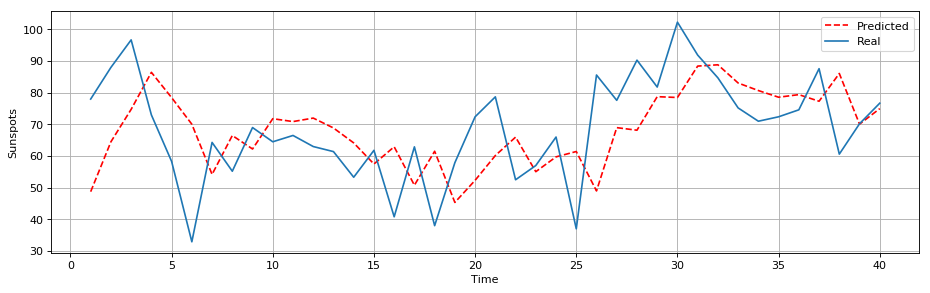

In [12]:
%matplotlib inline 
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
figure(num=None, figsize=(14, 4), dpi=80, facecolor='w', edgecolor='k')
#data_test_df.hist(bins=50, figsize=(20,13))
x = np.linspace(1, 40,num=40)
plt.plot(x,y_hat.values,'--r',label='Test')
plt.plot(x,labels_test_df.values,'-')
plt.grid(True)
plt.gca().legend(('Predicted','Real'))
plt.xlabel('Time')
plt.ylabel('Sunspots')

plt.show()

In [13]:
import random
k = 4
kfolds = []
indexes = list(range(3112))
seed = 42
subset_size = round(len(indexes) / k)
random.Random(seed).shuffle(indexes)
subsets = [indexes[x:x+subset_size] for x in range(0,len(indexes),subset_size)]
subsets

for i in range(k):
    test = subsets[i]
    train = []
    for subset in subsets:
        if subset != test:
            train.append(subset)
    kfolds.append((train, test)) # Cria tupla kfolds

In [14]:
data_full_df.head()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
0,103.0,85.4,100.0,90.0,88.3,89.2,75.9,73.3,85.2,158.6,75.5,75.9,66.3,94.8,83.5,85.0,55.7,70.0,62.6,58.0
1,91.2,103.0,85.4,100.0,90.0,88.3,89.2,75.9,73.3,85.2,158.6,75.5,75.9,66.3,94.8,83.5,85.0,55.7,70.0,62.6
2,65.7,91.2,103.0,85.4,100.0,90.0,88.3,89.2,75.9,73.3,85.2,158.6,75.5,75.9,66.3,94.8,83.5,85.0,55.7,70.0
3,63.3,65.7,91.2,103.0,85.4,100.0,90.0,88.3,89.2,75.9,73.3,85.2,158.6,75.5,75.9,66.3,94.8,83.5,85.0,55.7
4,75.4,63.3,65.7,91.2,103.0,85.4,100.0,90.0,88.3,89.2,75.9,73.3,85.2,158.6,75.5,75.9,66.3,94.8,83.5,85.0


In [34]:
#identity matrix
I = np.identity(21)
I[0][0] = 0
I_df = pd.DataFrame(I)
I_df

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [23]:
min_rmse_indexes = []
min_rmse_values = []
N = 20 #numero de variaveis
data_wrapper = data_full_df.iloc[:3112][:].copy()
data_wrapper.columns = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
k = 4
lambdas = [0.001, 0.01, 0.1, 1, 10]


labels_wrapper = labels_full.copy() # Cria uma cópia de y (dados c/ labels)

while (N > 1):
    errors = [] # Reseta o vetor errors
    for column in data_wrapper:
        errors_val = []
        best_data_wrapper = data_wrapper.copy() # Cria uma cópia do dataset data_wrapper 
    
        best_data_wrapper = best_data_wrapper.drop(column, axis=1) # Retira a coluna da interação
        best_data_wrapper.insert(loc=0, column=0, value=1) # Adiciona a coluna de 1s
        
        for num_fold in range(k):
            indices = []
            indices_val = []
            for lists in kfolds[num_fold][0]:
                for x in lists:
                    indices.append(x) # indices do conjunto de treino da pasta k
                    
            for x in kfolds[num_fold][1]:
                indices_val.append(x) # indices do conjunto de validação da pasta k
                           
            
            for lambd in lambdas:
                w = np.linalg.inv(best_data_wrapper.iloc[indices][:].T.dot(best_data_wrapper.iloc[indices][:])+lambd.dot(I_df)).dot(best_data_wrapper.iloc[indices][:].T).dot(labels_wrapper.iloc[indices][:].values)
                # Equação Normal da Regressão Linear utilizando o conjunto de treino da pasta k
                w = np.linalg.inv(best_data_wrapper.iloc[indices][:].T.dot(best_data_wrapper.iloc[indices][:])).dot(best_data_wrapper.iloc[indices][:].T).dot(labels_wrapper.iloc[indices][:].values)
                # Predições utilizando o conjunto de validação da pasta k
                y_hat_wrapper = best_data_wrapper.iloc[indices_val][:].dot(w)
                
            
            
            
            
            
            errors_val.append(error_val.values)
            print('Pasta: ', num_fold)
            print('dataset:')
            print(best_data_wrapper.head())
            print('erro de val.: ', error_val.values)
            
        print('errors val: ', errors_val)
        print('RMSE médio sem a variável', column)
        rmse_median = np.mean(errors_val)
        print(rmse_median)
        rmse_median_tuple = ((rmse_median.tolist(), str(column)))
        
        errors.append(rmse_median_tuple) # Append do erro correspondente a interação no vetor errors

    data_wrapper = data_wrapper.drop(int(errors[errors.index(min(errors))][1]), axis=1)
    print('\n', '#'*5, 'VARIÁVEL RETIRADA:', errors[errors.index(min(errors))][1], '#'*5, '\n')
        
    min_rmse_indexes.append(errors[errors.index(min(errors))][1])
    min_rmse_values.append(min(errors))
    #var.append(var_selected)       
    #print('\n', '#'*5, 'VARIÁVEL RETIRADA:', errors[errors.index(min(errors))][1], '#'*5, '\n')
    #data_wrapper = data_wrapper.drop(int(errors[errors.index(min(errors))][1]), axis=1)
    # pegando o índice que represeta o menor RMSE:
    #min_rmse_indexes.append(errors[errors.index(min(errors))][1])
    print('\n', '#'*5, 'VARIÁVEIS RETIRADAS:', min_rmse_indexes, '#'*5, '\n')
    # Append do menor valor RMSE médio:
    #min_rmse_values.append(min(errors))
    
    N-=1
    
print(min_rmse_indexes)
#print(var)
print(min_rmse_values)
    

Pasta:  0
dataset:
   0      2      3      4      5      6      7     8     9      10     11  \
0   1   85.4  100.0   90.0   88.3   89.2   75.9  73.3  85.2  158.6   75.5   
1   1  103.0   85.4  100.0   90.0   88.3   89.2  75.9  73.3   85.2  158.6   
2   1   91.2  103.0   85.4  100.0   90.0   88.3  89.2  75.9   73.3   85.2   
3   1   65.7   91.2  103.0   85.4  100.0   90.0  88.3  89.2   75.9   73.3   
4   1   63.3   65.7   91.2  103.0   85.4  100.0  90.0  88.3   89.2   75.9   

      12     13     14    15    16    17    18    19    20  
0   75.9   66.3   94.8  83.5  85.0  55.7  70.0  62.6  58.0  
1   75.5   75.9   66.3  94.8  83.5  85.0  55.7  70.0  62.6  
2  158.6   75.5   75.9  66.3  94.8  83.5  85.0  55.7  70.0  
3   85.2  158.6   75.5  75.9  66.3  94.8  83.5  85.0  55.7  
4   73.3   85.2  158.6  75.5  75.9  66.3  94.8  83.5  85.0  
erro de val.:  [18.56425759]
Pasta:  1
dataset:
   0      2      3      4      5      6      7     8     9      10     11  \
0   1   85.4  100.0   90.0 

   0      1      2      4      5      6      7     8     9      10     11  \
0   1  103.0   85.4   90.0   88.3   89.2   75.9  73.3  85.2  158.6   75.5   
1   1   91.2  103.0  100.0   90.0   88.3   89.2  75.9  73.3   85.2  158.6   
2   1   65.7   91.2   85.4  100.0   90.0   88.3  89.2  75.9   73.3   85.2   
3   1   63.3   65.7  103.0   85.4  100.0   90.0  88.3  89.2   75.9   73.3   
4   1   75.4   63.3   91.2  103.0   85.4  100.0  90.0  88.3   89.2   75.9   

      12     13     14    15    16    17    18    19    20  
0   75.9   66.3   94.8  83.5  85.0  55.7  70.0  62.6  58.0  
1   75.5   75.9   66.3  94.8  83.5  85.0  55.7  70.0  62.6  
2  158.6   75.5   75.9  66.3  94.8  83.5  85.0  55.7  70.0  
3   85.2  158.6   75.5  75.9  66.3  94.8  83.5  85.0  55.7  
4   73.3   85.2  158.6  75.5  75.9  66.3  94.8  83.5  85.0  
erro de val.:  [16.09658584]
errors val:  [array([16.02622322]), array([14.8197482]), array([15.44442104]), array([16.09658584])]
RMSE médio sem a variável 3
15.5967445734

Pasta:  1
dataset:
   0      1      2      3      4      5      7     8     9      10     11  \
0   1  103.0   85.4  100.0   90.0   88.3   75.9  73.3  85.2  158.6   75.5   
1   1   91.2  103.0   85.4  100.0   90.0   89.2  75.9  73.3   85.2  158.6   
2   1   65.7   91.2  103.0   85.4  100.0   88.3  89.2  75.9   73.3   85.2   
3   1   63.3   65.7   91.2  103.0   85.4   90.0  88.3  89.2   75.9   73.3   
4   1   75.4   63.3   65.7   91.2  103.0  100.0  90.0  88.3   89.2   75.9   

      12     13     14    15    16    17    18    19    20  
0   75.9   66.3   94.8  83.5  85.0  55.7  70.0  62.6  58.0  
1   75.5   75.9   66.3  94.8  83.5  85.0  55.7  70.0  62.6  
2  158.6   75.5   75.9  66.3  94.8  83.5  85.0  55.7  70.0  
3   85.2  158.6   75.5  75.9  66.3  94.8  83.5  85.0  55.7  
4   73.3   85.2  158.6  75.5  75.9  66.3  94.8  83.5  85.0  
erro de val.:  [14.82316008]
Pasta:  2
dataset:
   0      1      2      3      4      5      7     8     9      10     11  \
0   1  103.0   85.4  100.0 

Pasta:  3
dataset:
   0      1      2      3      4      5      6      7     9      10     11  \
0   1  103.0   85.4  100.0   90.0   88.3   89.2   75.9  85.2  158.6   75.5   
1   1   91.2  103.0   85.4  100.0   90.0   88.3   89.2  73.3   85.2  158.6   
2   1   65.7   91.2  103.0   85.4  100.0   90.0   88.3  75.9   73.3   85.2   
3   1   63.3   65.7   91.2  103.0   85.4  100.0   90.0  89.2   75.9   73.3   
4   1   75.4   63.3   65.7   91.2  103.0   85.4  100.0  88.3   89.2   75.9   

      12     13     14    15    16    17    18    19    20  
0   75.9   66.3   94.8  83.5  85.0  55.7  70.0  62.6  58.0  
1   75.5   75.9   66.3  94.8  83.5  85.0  55.7  70.0  62.6  
2  158.6   75.5   75.9  66.3  94.8  83.5  85.0  55.7  70.0  
3   85.2  158.6   75.5  75.9  66.3  94.8  83.5  85.0  55.7  
4   73.3   85.2  158.6  75.5  75.9  66.3  94.8  83.5  85.0  
erro de val.:  [16.00035984]
errors val:  [array([15.98933595]), array([14.77427011]), array([15.35352046]), array([16.00035984])]
RMSE médio sem 

   0      1      2      3      4      5      6      7     8     9      10  \
0   1  103.0   85.4  100.0   90.0   88.3   89.2   75.9  73.3  85.2  158.6   
1   1   91.2  103.0   85.4  100.0   90.0   88.3   89.2  75.9  73.3   85.2   
2   1   65.7   91.2  103.0   85.4  100.0   90.0   88.3  89.2  75.9   73.3   
3   1   63.3   65.7   91.2  103.0   85.4  100.0   90.0  88.3  89.2   75.9   
4   1   75.4   63.3   65.7   91.2  103.0   85.4  100.0  90.0  88.3   89.2   

      12     13     14    15    16    17    18    19    20  
0   75.9   66.3   94.8  83.5  85.0  55.7  70.0  62.6  58.0  
1   75.5   75.9   66.3  94.8  83.5  85.0  55.7  70.0  62.6  
2  158.6   75.5   75.9  66.3  94.8  83.5  85.0  55.7  70.0  
3   85.2  158.6   75.5  75.9  66.3  94.8  83.5  85.0  55.7  
4   73.3   85.2  158.6  75.5  75.9  66.3  94.8  83.5  85.0  
erro de val.:  [14.69621475]
Pasta:  2
dataset:
   0      1      2      3      4      5      6      7     8     9      10  \
0   1  103.0   85.4  100.0   90.0   88.3   89.

Pasta:  0
dataset:
   0      1      2      3      4      5      6      7     8     9      10  \
0   1  103.0   85.4  100.0   90.0   88.3   89.2   75.9  73.3  85.2  158.6   
1   1   91.2  103.0   85.4  100.0   90.0   88.3   89.2  75.9  73.3   85.2   
2   1   65.7   91.2  103.0   85.4  100.0   90.0   88.3  89.2  75.9   73.3   
3   1   63.3   65.7   91.2  103.0   85.4  100.0   90.0  88.3  89.2   75.9   
4   1   75.4   63.3   65.7   91.2  103.0   85.4  100.0  90.0  88.3   89.2   

      11     12     13    15    16    17    18    19    20  
0   75.5   75.9   66.3  83.5  85.0  55.7  70.0  62.6  58.0  
1  158.6   75.5   75.9  94.8  83.5  85.0  55.7  70.0  62.6  
2   85.2  158.6   75.5  66.3  94.8  83.5  85.0  55.7  70.0  
3   73.3   85.2  158.6  75.9  66.3  94.8  83.5  85.0  55.7  
4   75.9   73.3   85.2  75.5  75.9  66.3  94.8  83.5  85.0  
erro de val.:  [16.03041525]
Pasta:  1
dataset:
   0      1      2      3      4      5      6      7     8     9      10  \
0   1  103.0   85.4  100.0 

Pasta:  1
dataset:
   0      1      2      3      4      5      6      7     8     9      10  \
0   1  103.0   85.4  100.0   90.0   88.3   89.2   75.9  73.3  85.2  158.6   
1   1   91.2  103.0   85.4  100.0   90.0   88.3   89.2  75.9  73.3   85.2   
2   1   65.7   91.2  103.0   85.4  100.0   90.0   88.3  89.2  75.9   73.3   
3   1   63.3   65.7   91.2  103.0   85.4  100.0   90.0  88.3  89.2   75.9   
4   1   75.4   63.3   65.7   91.2  103.0   85.4  100.0  90.0  88.3   89.2   

      11     12     13     14    15    17    18    19    20  
0   75.5   75.9   66.3   94.8  83.5  55.7  70.0  62.6  58.0  
1  158.6   75.5   75.9   66.3  94.8  85.0  55.7  70.0  62.6  
2   85.2  158.6   75.5   75.9  66.3  83.5  85.0  55.7  70.0  
3   73.3   85.2  158.6   75.5  75.9  94.8  83.5  85.0  55.7  
4   75.9   73.3   85.2  158.6  75.5  66.3  94.8  83.5  85.0  
erro de val.:  [14.80060206]
Pasta:  2
dataset:
   0      1      2      3      4      5      6      7     8     9      10  \
0   1  103.0   85.4  

   0      1      2      3      4      5      6      7     8     9      10  \
0   1  103.0   85.4  100.0   90.0   88.3   89.2   75.9  73.3  85.2  158.6   
1   1   91.2  103.0   85.4  100.0   90.0   88.3   89.2  75.9  73.3   85.2   
2   1   65.7   91.2  103.0   85.4  100.0   90.0   88.3  89.2  75.9   73.3   
3   1   63.3   65.7   91.2  103.0   85.4  100.0   90.0  88.3  89.2   75.9   
4   1   75.4   63.3   65.7   91.2  103.0   85.4  100.0  90.0  88.3   89.2   

      11     12     13     14    15    16    17    19    20  
0   75.5   75.9   66.3   94.8  83.5  85.0  55.7  62.6  58.0  
1  158.6   75.5   75.9   66.3  94.8  83.5  85.0  70.0  62.6  
2   85.2  158.6   75.5   75.9  66.3  94.8  83.5  55.7  70.0  
3   73.3   85.2  158.6   75.5  75.9  66.3  94.8  85.0  55.7  
4   75.9   73.3   85.2  158.6  75.5  75.9  66.3  83.5  85.0  
erro de val.:  [16.06614876]
errors val:  [array([15.99530752]), array([14.7619119]), array([15.43311446]), array([16.06614876])]
RMSE médio sem a variável 18
15.564

Pasta:  2
dataset:
   0      2      3      4      5      6      7     8     9      10     12  \
0   1   85.4  100.0   90.0   88.3   89.2   75.9  73.3  85.2  158.6   75.9   
1   1  103.0   85.4  100.0   90.0   88.3   89.2  75.9  73.3   85.2   75.5   
2   1   91.2  103.0   85.4  100.0   90.0   88.3  89.2  75.9   73.3  158.6   
3   1   65.7   91.2  103.0   85.4  100.0   90.0  88.3  89.2   75.9   85.2   
4   1   63.3   65.7   91.2  103.0   85.4  100.0  90.0  88.3   89.2   73.3   

      13     14    15    16    17    18    19    20  
0   66.3   94.8  83.5  85.0  55.7  70.0  62.6  58.0  
1   75.9   66.3  94.8  83.5  85.0  55.7  70.0  62.6  
2   75.5   75.9  66.3  94.8  83.5  85.0  55.7  70.0  
3  158.6   75.5  75.9  66.3  94.8  83.5  85.0  55.7  
4   85.2  158.6  75.5  75.9  66.3  94.8  83.5  85.0  
erro de val.:  [17.40565549]
Pasta:  3
dataset:
   0      2      3      4      5      6      7     8     9      10     12  \
0   1   85.4  100.0   90.0   88.3   89.2   75.9  73.3  85.2  158.6   

Pasta:  0
dataset:
   0      1      2      3      5      6      7     8     9      10     12  \
0   1  103.0   85.4  100.0   88.3   89.2   75.9  73.3  85.2  158.6   75.9   
1   1   91.2  103.0   85.4   90.0   88.3   89.2  75.9  73.3   85.2   75.5   
2   1   65.7   91.2  103.0  100.0   90.0   88.3  89.2  75.9   73.3  158.6   
3   1   63.3   65.7   91.2   85.4  100.0   90.0  88.3  89.2   75.9   85.2   
4   1   75.4   63.3   65.7  103.0   85.4  100.0  90.0  88.3   89.2   73.3   

      13     14    15    16    17    18    19    20  
0   66.3   94.8  83.5  85.0  55.7  70.0  62.6  58.0  
1   75.9   66.3  94.8  83.5  85.0  55.7  70.0  62.6  
2   75.5   75.9  66.3  94.8  83.5  85.0  55.7  70.0  
3  158.6   75.5  75.9  66.3  94.8  83.5  85.0  55.7  
4   85.2  158.6  75.5  75.9  66.3  94.8  83.5  85.0  
erro de val.:  [16.07700669]
Pasta:  1
dataset:
   0      1      2      3      5      6      7     8     9      10     12  \
0   1  103.0   85.4  100.0   88.3   89.2   75.9  73.3  85.2  158.6   

4   85.2  158.6  75.5  75.9  66.3  94.8  83.5  85.0  
erro de val.:  [16.04995156]
errors val:  [array([15.9800805]), array([14.74782053]), array([15.37657858]), array([16.04995156])]
RMSE médio sem a variável 6
15.538607791588745
Pasta:  0
dataset:
   0      1      2      3      4      5      6     8     9      10     12  \
0   1  103.0   85.4  100.0   90.0   88.3   89.2  73.3  85.2  158.6   75.9   
1   1   91.2  103.0   85.4  100.0   90.0   88.3  75.9  73.3   85.2   75.5   
2   1   65.7   91.2  103.0   85.4  100.0   90.0  89.2  75.9   73.3  158.6   
3   1   63.3   65.7   91.2  103.0   85.4  100.0  88.3  89.2   75.9   85.2   
4   1   75.4   63.3   65.7   91.2  103.0   85.4  90.0  88.3   89.2   73.3   

      13     14    15    16    17    18    19    20  
0   66.3   94.8  83.5  85.0  55.7  70.0  62.6  58.0  
1   75.9   66.3  94.8  83.5  85.0  55.7  70.0  62.6  
2   75.5   75.9  66.3  94.8  83.5  85.0  55.7  70.0  
3  158.6   75.5  75.9  66.3  94.8  83.5  85.0  55.7  
4   85.2  158.6  

Pasta:  3
dataset:
   0      1      2      3      4      5      6      7     8      10     12  \
0   1  103.0   85.4  100.0   90.0   88.3   89.2   75.9  73.3  158.6   75.9   
1   1   91.2  103.0   85.4  100.0   90.0   88.3   89.2  75.9   85.2   75.5   
2   1   65.7   91.2  103.0   85.4  100.0   90.0   88.3  89.2   73.3  158.6   
3   1   63.3   65.7   91.2  103.0   85.4  100.0   90.0  88.3   75.9   85.2   
4   1   75.4   63.3   65.7   91.2  103.0   85.4  100.0  90.0   89.2   73.3   

      13     14    15    16    17    18    19    20  
0   66.3   94.8  83.5  85.0  55.7  70.0  62.6  58.0  
1   75.9   66.3  94.8  83.5  85.0  55.7  70.0  62.6  
2   75.5   75.9  66.3  94.8  83.5  85.0  55.7  70.0  
3  158.6   75.5  75.9  66.3  94.8  83.5  85.0  55.7  
4   85.2  158.6  75.5  75.9  66.3  94.8  83.5  85.0  
erro de val.:  [16.11793626]
errors val:  [array([16.14199221]), array([14.7045584]), array([15.29477374]), array([16.11793626])]
RMSE médio sem a variável 9
15.564815150136106
Pasta:  0
d

Pasta:  1
dataset:
   0      1      2      3      4      5      6      7     8     9      10  \
0   1  103.0   85.4  100.0   90.0   88.3   89.2   75.9  73.3  85.2  158.6   
1   1   91.2  103.0   85.4  100.0   90.0   88.3   89.2  75.9  73.3   85.2   
2   1   65.7   91.2  103.0   85.4  100.0   90.0   88.3  89.2  75.9   73.3   
3   1   63.3   65.7   91.2  103.0   85.4  100.0   90.0  88.3  89.2   75.9   
4   1   75.4   63.3   65.7   91.2  103.0   85.4  100.0  90.0  88.3   89.2   

      12     13    15    16    17    18    19    20  
0   75.9   66.3  83.5  85.0  55.7  70.0  62.6  58.0  
1   75.5   75.9  94.8  83.5  85.0  55.7  70.0  62.6  
2  158.6   75.5  66.3  94.8  83.5  85.0  55.7  70.0  
3   85.2  158.6  75.9  66.3  94.8  83.5  85.0  55.7  
4   73.3   85.2  75.5  75.9  66.3  94.8  83.5  85.0  
erro de val.:  [14.70643743]
Pasta:  2
dataset:
   0      1      2      3      4      5      6      7     8     9      10  \
0   1  103.0   85.4  100.0   90.0   88.3   89.2   75.9  73.3  85.2  1

Pasta:  3
dataset:
   0      1      2      3      4      5      6      7     8     9      10  \
0   1  103.0   85.4  100.0   90.0   88.3   89.2   75.9  73.3  85.2  158.6   
1   1   91.2  103.0   85.4  100.0   90.0   88.3   89.2  75.9  73.3   85.2   
2   1   65.7   91.2  103.0   85.4  100.0   90.0   88.3  89.2  75.9   73.3   
3   1   63.3   65.7   91.2  103.0   85.4  100.0   90.0  88.3  89.2   75.9   
4   1   75.4   63.3   65.7   91.2  103.0   85.4  100.0  90.0  88.3   89.2   

      12     13     14    15    17    18    19    20  
0   75.9   66.3   94.8  83.5  55.7  70.0  62.6  58.0  
1   75.5   75.9   66.3  94.8  85.0  55.7  70.0  62.6  
2  158.6   75.5   75.9  66.3  83.5  85.0  55.7  70.0  
3   85.2  158.6   75.5  75.9  94.8  83.5  85.0  55.7  
4   73.3   85.2  158.6  75.5  66.3  94.8  83.5  85.0  
erro de val.:  [16.03756025]
errors val:  [array([16.00901298]), array([14.72029019]), array([15.37606219]), array([16.03756025])]
RMSE médio sem a variável 16
15.53573140152933
Pasta:  0


Pasta:  2
dataset:
   0      1      2      3      4      5      6      7     8     9      10  \
0   1  103.0   85.4  100.0   90.0   88.3   89.2   75.9  73.3  85.2  158.6   
1   1   91.2  103.0   85.4  100.0   90.0   88.3   89.2  75.9  73.3   85.2   
2   1   65.7   91.2  103.0   85.4  100.0   90.0   88.3  89.2  75.9   73.3   
3   1   63.3   65.7   91.2  103.0   85.4  100.0   90.0  88.3  89.2   75.9   
4   1   75.4   63.3   65.7   91.2  103.0   85.4  100.0  90.0  88.3   89.2   

      12     13     14    15    16    17    18    20  
0   75.9   66.3   94.8  83.5  85.0  55.7  70.0  58.0  
1   75.5   75.9   66.3  94.8  83.5  85.0  55.7  62.6  
2  158.6   75.5   75.9  66.3  94.8  83.5  85.0  70.0  
3   85.2  158.6   75.5  75.9  66.3  94.8  83.5  55.7  
4   73.3   85.2  158.6  75.5  75.9  66.3  94.8  85.0  
erro de val.:  [15.34598511]
Pasta:  3
dataset:
   0      1      2      3      4      5      6      7     8     9      10  \
0   1  103.0   85.4  100.0   90.0   88.3   89.2   75.9  73.3  8

   0      1      2      4      5      6      7     9      10     12     13  \
0   1  103.0   85.4   90.0   88.3   89.2   75.9  85.2  158.6   75.9   66.3   
1   1   91.2  103.0  100.0   90.0   88.3   89.2  73.3   85.2   75.5   75.9   
2   1   65.7   91.2   85.4  100.0   90.0   88.3  75.9   73.3  158.6   75.5   
3   1   63.3   65.7  103.0   85.4  100.0   90.0  89.2   75.9   85.2  158.6   
4   1   75.4   63.3   91.2  103.0   85.4  100.0  88.3   89.2   73.3   85.2   

      14    15    16    17    18    19    20  
0   94.8  83.5  85.0  55.7  70.0  62.6  58.0  
1   66.3  94.8  83.5  85.0  55.7  70.0  62.6  
2   75.9  66.3  94.8  83.5  85.0  55.7  70.0  
3   75.5  75.9  66.3  94.8  83.5  85.0  55.7  
4  158.6  75.5  75.9  66.3  94.8  83.5  85.0  
erro de val.:  [15.43890067]
Pasta:  3
dataset:
   0      1      2      4      5      6      7     9      10     12     13  \
0   1  103.0   85.4   90.0   88.3   89.2   75.9  85.2  158.6   75.9   66.3   
1   1   91.2  103.0  100.0   90.0   88.3   89

Pasta:  0
dataset:
   0      1      2      3      4      5      7     9      10     12     13  \
0   1  103.0   85.4  100.0   90.0   88.3   75.9  85.2  158.6   75.9   66.3   
1   1   91.2  103.0   85.4  100.0   90.0   89.2  73.3   85.2   75.5   75.9   
2   1   65.7   91.2  103.0   85.4  100.0   88.3  75.9   73.3  158.6   75.5   
3   1   63.3   65.7   91.2  103.0   85.4   90.0  89.2   75.9   85.2  158.6   
4   1   75.4   63.3   65.7   91.2  103.0  100.0  88.3   89.2   73.3   85.2   

      14    15    16    17    18    19    20  
0   94.8  83.5  85.0  55.7  70.0  62.6  58.0  
1   66.3  94.8  83.5  85.0  55.7  70.0  62.6  
2   75.9  66.3  94.8  83.5  85.0  55.7  70.0  
3   75.5  75.9  66.3  94.8  83.5  85.0  55.7  
4  158.6  75.5  75.9  66.3  94.8  83.5  85.0  
erro de val.:  [15.9524701]
Pasta:  1
dataset:
   0      1      2      3      4      5      7     9      10     12     13  \
0   1  103.0   85.4  100.0   90.0   88.3   75.9  85.2  158.6   75.9   66.3   
1   1   91.2  103.0   85.4 

Pasta:  0
dataset:
   0      1      2      3      4      5      6      7     9      12     13  \
0   1  103.0   85.4  100.0   90.0   88.3   89.2   75.9  85.2   75.9   66.3   
1   1   91.2  103.0   85.4  100.0   90.0   88.3   89.2  73.3   75.5   75.9   
2   1   65.7   91.2  103.0   85.4  100.0   90.0   88.3  75.9  158.6   75.5   
3   1   63.3   65.7   91.2  103.0   85.4  100.0   90.0  89.2   85.2  158.6   
4   1   75.4   63.3   65.7   91.2  103.0   85.4  100.0  88.3   73.3   85.2   

      14    15    16    17    18    19    20  
0   94.8  83.5  85.0  55.7  70.0  62.6  58.0  
1   66.3  94.8  83.5  85.0  55.7  70.0  62.6  
2   75.9  66.3  94.8  83.5  85.0  55.7  70.0  
3   75.5  75.9  66.3  94.8  83.5  85.0  55.7  
4  158.6  75.5  75.9  66.3  94.8  83.5  85.0  
erro de val.:  [15.9698667]
Pasta:  1
dataset:
   0      1      2      3      4      5      6      7     9      12     13  \
0   1  103.0   85.4  100.0   90.0   88.3   89.2   75.9  85.2   75.9   66.3   
1   1   91.2  103.0   85.4 

4  158.6  75.5  75.9  66.3  94.8  83.5  85.0  
erro de val.:  [15.33243914]
Pasta:  3
dataset:
   0      1      2      3      4      5      6      7     9      10     12  \
0   1  103.0   85.4  100.0   90.0   88.3   89.2   75.9  85.2  158.6   75.9   
1   1   91.2  103.0   85.4  100.0   90.0   88.3   89.2  73.3   85.2   75.5   
2   1   65.7   91.2  103.0   85.4  100.0   90.0   88.3  75.9   73.3  158.6   
3   1   63.3   65.7   91.2  103.0   85.4  100.0   90.0  89.2   75.9   85.2   
4   1   75.4   63.3   65.7   91.2  103.0   85.4  100.0  88.3   89.2   73.3   

      14    15    16    17    18    19    20  
0   94.8  83.5  85.0  55.7  70.0  62.6  58.0  
1   66.3  94.8  83.5  85.0  55.7  70.0  62.6  
2   75.9  66.3  94.8  83.5  85.0  55.7  70.0  
3   75.5  75.9  66.3  94.8  83.5  85.0  55.7  
4  158.6  75.5  75.9  66.3  94.8  83.5  85.0  
erro de val.:  [16.00687333]
errors val:  [array([16.00831682]), array([14.70279447]), array([15.33243914]), array([16.00687333])]
RMSE médio sem a variáv

4   85.2  158.6  75.5  75.9  94.8  83.5  85.0  
erro de val.:  [14.68979922]
Pasta:  2
dataset:
   0      1      2      3      4      5      6      7     9      10     12  \
0   1  103.0   85.4  100.0   90.0   88.3   89.2   75.9  85.2  158.6   75.9   
1   1   91.2  103.0   85.4  100.0   90.0   88.3   89.2  73.3   85.2   75.5   
2   1   65.7   91.2  103.0   85.4  100.0   90.0   88.3  75.9   73.3  158.6   
3   1   63.3   65.7   91.2  103.0   85.4  100.0   90.0  89.2   75.9   85.2   
4   1   75.4   63.3   65.7   91.2  103.0   85.4  100.0  88.3   89.2   73.3   

      13     14    15    16    18    19    20  
0   66.3   94.8  83.5  85.0  70.0  62.6  58.0  
1   75.9   66.3  94.8  83.5  55.7  70.0  62.6  
2   75.5   75.9  66.3  94.8  85.0  55.7  70.0  
3  158.6   75.5  75.9  66.3  83.5  85.0  55.7  
4   85.2  158.6  75.5  75.9  94.8  83.5  85.0  
erro de val.:  [15.34967916]
Pasta:  3
dataset:
   0      1      2      3      4      5      6      7     9      10     12  \
0   1  103.0   85.4  

Pasta:  1
dataset:
   0      1      2      3      4      5      6      7     9      10     12  \
0   1  103.0   85.4  100.0   90.0   88.3   89.2   75.9  85.2  158.6   75.9   
1   1   91.2  103.0   85.4  100.0   90.0   88.3   89.2  73.3   85.2   75.5   
2   1   65.7   91.2  103.0   85.4  100.0   90.0   88.3  75.9   73.3  158.6   
3   1   63.3   65.7   91.2  103.0   85.4  100.0   90.0  89.2   75.9   85.2   
4   1   75.4   63.3   65.7   91.2  103.0   85.4  100.0  88.3   89.2   73.3   

      13     14    15    16    17    18    19  
0   66.3   94.8  83.5  85.0  55.7  70.0  62.6  
1   75.9   66.3  94.8  83.5  85.0  55.7  70.0  
2   75.5   75.9  66.3  94.8  83.5  85.0  55.7  
3  158.6   75.5  75.9  66.3  94.8  83.5  85.0  
4   85.2  158.6  75.5  75.9  66.3  94.8  83.5  
erro de val.:  [14.74082486]
Pasta:  2
dataset:
   0      1      2      3      4      5      6      7     9      10     12  \
0   1  103.0   85.4  100.0   90.0   88.3   89.2   75.9  85.2  158.6   75.9   
1   1   91.2  103.0 

Pasta:  2
dataset:
   0      1      2      4      5      6      7     9      10     12     13  \
0   1  103.0   85.4   90.0   88.3   89.2   75.9  85.2  158.6   75.9   66.3   
1   1   91.2  103.0  100.0   90.0   88.3   89.2  73.3   85.2   75.5   75.9   
2   1   65.7   91.2   85.4  100.0   90.0   88.3  75.9   73.3  158.6   75.5   
3   1   63.3   65.7  103.0   85.4  100.0   90.0  89.2   75.9   85.2  158.6   
4   1   75.4   63.3   91.2  103.0   85.4  100.0  88.3   89.2   73.3   85.2   

      14    16    17    18    19    20  
0   94.8  85.0  55.7  70.0  62.6  58.0  
1   66.3  83.5  85.0  55.7  70.0  62.6  
2   75.9  94.8  83.5  85.0  55.7  70.0  
3   75.5  66.3  94.8  83.5  85.0  55.7  
4  158.6  75.9  66.3  94.8  83.5  85.0  
erro de val.:  [15.43744801]
Pasta:  3
dataset:
   0      1      2      4      5      6      7     9      10     12     13  \
0   1  103.0   85.4   90.0   88.3   89.2   75.9  85.2  158.6   75.9   66.3   
1   1   91.2  103.0  100.0   90.0   88.3   89.2  73.3   85.2  

Pasta:  2
dataset:
   0      1      2      3      4      5      7     9      10     12     13  \
0   1  103.0   85.4  100.0   90.0   88.3   75.9  85.2  158.6   75.9   66.3   
1   1   91.2  103.0   85.4  100.0   90.0   89.2  73.3   85.2   75.5   75.9   
2   1   65.7   91.2  103.0   85.4  100.0   88.3  75.9   73.3  158.6   75.5   
3   1   63.3   65.7   91.2  103.0   85.4   90.0  89.2   75.9   85.2  158.6   
4   1   75.4   63.3   65.7   91.2  103.0  100.0  88.3   89.2   73.3   85.2   

      14    16    17    18    19    20  
0   94.8  85.0  55.7  70.0  62.6  58.0  
1   66.3  83.5  85.0  55.7  70.0  62.6  
2   75.9  94.8  83.5  85.0  55.7  70.0  
3   75.5  66.3  94.8  83.5  85.0  55.7  
4  158.6  75.9  66.3  94.8  83.5  85.0  
erro de val.:  [15.37155632]
Pasta:  3
dataset:
   0      1      2      3      4      5      7     9      10     12     13  \
0   1  103.0   85.4  100.0   90.0   88.3   75.9  85.2  158.6   75.9   66.3   
1   1   91.2  103.0   85.4  100.0   90.0   89.2  73.3   85.2  

Pasta:  2
dataset:
   0      1      2      3      4      5      6      7     9      12     13  \
0   1  103.0   85.4  100.0   90.0   88.3   89.2   75.9  85.2   75.9   66.3   
1   1   91.2  103.0   85.4  100.0   90.0   88.3   89.2  73.3   75.5   75.9   
2   1   65.7   91.2  103.0   85.4  100.0   90.0   88.3  75.9  158.6   75.5   
3   1   63.3   65.7   91.2  103.0   85.4  100.0   90.0  89.2   85.2  158.6   
4   1   75.4   63.3   65.7   91.2  103.0   85.4  100.0  88.3   73.3   85.2   

      14    16    17    18    19    20  
0   94.8  85.0  55.7  70.0  62.6  58.0  
1   66.3  83.5  85.0  55.7  70.0  62.6  
2   75.9  94.8  83.5  85.0  55.7  70.0  
3   75.5  66.3  94.8  83.5  85.0  55.7  
4  158.6  75.9  66.3  94.8  83.5  85.0  
erro de val.:  [15.36031574]
Pasta:  3
dataset:
   0      1      2      3      4      5      6      7     9      12     13  \
0   1  103.0   85.4  100.0   90.0   88.3   89.2   75.9  85.2   75.9   66.3   
1   1   91.2  103.0   85.4  100.0   90.0   88.3   89.2  73.3  

Pasta:  1
dataset:
   0      1      2      3      4      5      6      7     9      10     12  \
0   1  103.0   85.4  100.0   90.0   88.3   89.2   75.9  85.2  158.6   75.9   
1   1   91.2  103.0   85.4  100.0   90.0   88.3   89.2  73.3   85.2   75.5   
2   1   65.7   91.2  103.0   85.4  100.0   90.0   88.3  75.9   73.3  158.6   
3   1   63.3   65.7   91.2  103.0   85.4  100.0   90.0  89.2   75.9   85.2   
4   1   75.4   63.3   65.7   91.2  103.0   85.4  100.0  88.3   89.2   73.3   

      13    16    17    18    19    20  
0   66.3  85.0  55.7  70.0  62.6  58.0  
1   75.9  83.5  85.0  55.7  70.0  62.6  
2   75.5  94.8  83.5  85.0  55.7  70.0  
3  158.6  66.3  94.8  83.5  85.0  55.7  
4   85.2  75.9  66.3  94.8  83.5  85.0  
erro de val.:  [14.70366511]
Pasta:  2
dataset:
   0      1      2      3      4      5      6      7     9      10     12  \
0   1  103.0   85.4  100.0   90.0   88.3   89.2   75.9  85.2  158.6   75.9   
1   1   91.2  103.0   85.4  100.0   90.0   88.3   89.2  73.3  

Pasta:  2
dataset:
   0      1      2      3      4      5      6      7     9      10     12  \
0   1  103.0   85.4  100.0   90.0   88.3   89.2   75.9  85.2  158.6   75.9   
1   1   91.2  103.0   85.4  100.0   90.0   88.3   89.2  73.3   85.2   75.5   
2   1   65.7   91.2  103.0   85.4  100.0   90.0   88.3  75.9   73.3  158.6   
3   1   63.3   65.7   91.2  103.0   85.4  100.0   90.0  89.2   75.9   85.2   
4   1   75.4   63.3   65.7   91.2  103.0   85.4  100.0  88.3   89.2   73.3   

      13     14    16    17    19    20  
0   66.3   94.8  85.0  55.7  62.6  58.0  
1   75.9   66.3  83.5  85.0  70.0  62.6  
2   75.5   75.9  94.8  83.5  55.7  70.0  
3  158.6   75.5  66.3  94.8  85.0  55.7  
4   85.2  158.6  75.9  66.3  83.5  85.0  
erro de val.:  [15.42708087]
Pasta:  3
dataset:
   0      1      2      3      4      5      6      7     9      10     12  \
0   1  103.0   85.4  100.0   90.0   88.3   89.2   75.9  85.2  158.6   75.9   
1   1   91.2  103.0   85.4  100.0   90.0   88.3   89.2  

Pasta:  2
dataset:
   0      2      3      4      5      6      7     9      10     12     13  \
0   1   85.4  100.0   90.0   88.3   89.2   75.9  85.2  158.6   75.9   66.3   
1   1  103.0   85.4  100.0   90.0   88.3   89.2  73.3   85.2   75.5   75.9   
2   1   91.2  103.0   85.4  100.0   90.0   88.3  75.9   73.3  158.6   75.5   
3   1   65.7   91.2  103.0   85.4  100.0   90.0  89.2   75.9   85.2  158.6   
4   1   63.3   65.7   91.2  103.0   85.4  100.0  88.3   89.2   73.3   85.2   

     16    17    18    19    20  
0  85.0  55.7  70.0  62.6  58.0  
1  83.5  85.0  55.7  70.0  62.6  
2  94.8  83.5  85.0  55.7  70.0  
3  66.3  94.8  83.5  85.0  55.7  
4  75.9  66.3  94.8  83.5  85.0  
erro de val.:  [17.39510189]
Pasta:  3
dataset:
   0      2      3      4      5      6      7     9      10     12     13  \
0   1   85.4  100.0   90.0   88.3   89.2   75.9  85.2  158.6   75.9   66.3   
1   1  103.0   85.4  100.0   90.0   88.3   89.2  73.3   85.2   75.5   75.9   
2   1   91.2  103.0   85.4

Pasta:  2
dataset:
   0      1      2      3      5      6      7     9      10     12     13  \
0   1  103.0   85.4  100.0   88.3   89.2   75.9  85.2  158.6   75.9   66.3   
1   1   91.2  103.0   85.4   90.0   88.3   89.2  73.3   85.2   75.5   75.9   
2   1   65.7   91.2  103.0  100.0   90.0   88.3  75.9   73.3  158.6   75.5   
3   1   63.3   65.7   91.2   85.4  100.0   90.0  89.2   75.9   85.2  158.6   
4   1   75.4   63.3   65.7  103.0   85.4  100.0  88.3   89.2   73.3   85.2   

     16    17    18    19    20  
0  85.0  55.7  70.0  62.6  58.0  
1  83.5  85.0  55.7  70.0  62.6  
2  94.8  83.5  85.0  55.7  70.0  
3  66.3  94.8  83.5  85.0  55.7  
4  75.9  66.3  94.8  83.5  85.0  
erro de val.:  [15.38537832]
Pasta:  3
dataset:
   0      1      2      3      5      6      7     9      10     12     13  \
0   1  103.0   85.4  100.0   88.3   89.2   75.9  85.2  158.6   75.9   66.3   
1   1   91.2  103.0   85.4   90.0   88.3   89.2  73.3   85.2   75.5   75.9   
2   1   65.7   91.2  103.0

Pasta:  1
dataset:
   0      1      2      3      4      5      6     9      10     12     13  \
0   1  103.0   85.4  100.0   90.0   88.3   89.2  85.2  158.6   75.9   66.3   
1   1   91.2  103.0   85.4  100.0   90.0   88.3  73.3   85.2   75.5   75.9   
2   1   65.7   91.2  103.0   85.4  100.0   90.0  75.9   73.3  158.6   75.5   
3   1   63.3   65.7   91.2  103.0   85.4  100.0  89.2   75.9   85.2  158.6   
4   1   75.4   63.3   65.7   91.2  103.0   85.4  88.3   89.2   73.3   85.2   

     16    17    18    19    20  
0  85.0  55.7  70.0  62.6  58.0  
1  83.5  85.0  55.7  70.0  62.6  
2  94.8  83.5  85.0  55.7  70.0  
3  66.3  94.8  83.5  85.0  55.7  
4  75.9  66.3  94.8  83.5  85.0  
erro de val.:  [14.6966941]
Pasta:  2
dataset:
   0      1      2      3      4      5      6     9      10     12     13  \
0   1  103.0   85.4  100.0   90.0   88.3   89.2  85.2  158.6   75.9   66.3   
1   1   91.2  103.0   85.4  100.0   90.0   88.3  73.3   85.2   75.5   75.9   
2   1   65.7   91.2  103.0 

Pasta:  0
dataset:
   0      1      2      3      4      5      6      7     9      10     13  \
0   1  103.0   85.4  100.0   90.0   88.3   89.2   75.9  85.2  158.6   66.3   
1   1   91.2  103.0   85.4  100.0   90.0   88.3   89.2  73.3   85.2   75.9   
2   1   65.7   91.2  103.0   85.4  100.0   90.0   88.3  75.9   73.3   75.5   
3   1   63.3   65.7   91.2  103.0   85.4  100.0   90.0  89.2   75.9  158.6   
4   1   75.4   63.3   65.7   91.2  103.0   85.4  100.0  88.3   89.2   85.2   

     16    17    18    19    20  
0  85.0  55.7  70.0  62.6  58.0  
1  83.5  85.0  55.7  70.0  62.6  
2  94.8  83.5  85.0  55.7  70.0  
3  66.3  94.8  83.5  85.0  55.7  
4  75.9  66.3  94.8  83.5  85.0  
erro de val.:  [16.00188998]
Pasta:  1
dataset:
   0      1      2      3      4      5      6      7     9      10     13  \
0   1  103.0   85.4  100.0   90.0   88.3   89.2   75.9  85.2  158.6   66.3   
1   1   91.2  103.0   85.4  100.0   90.0   88.3   89.2  73.3   85.2   75.9   
2   1   65.7   91.2  103.0

4   85.2  75.9  94.8  83.5  85.0  
erro de val.:  [14.69971407]
Pasta:  2
dataset:
   0      1      2      3      4      5      6      7     9      10     12  \
0   1  103.0   85.4  100.0   90.0   88.3   89.2   75.9  85.2  158.6   75.9   
1   1   91.2  103.0   85.4  100.0   90.0   88.3   89.2  73.3   85.2   75.5   
2   1   65.7   91.2  103.0   85.4  100.0   90.0   88.3  75.9   73.3  158.6   
3   1   63.3   65.7   91.2  103.0   85.4  100.0   90.0  89.2   75.9   85.2   
4   1   75.4   63.3   65.7   91.2  103.0   85.4  100.0  88.3   89.2   73.3   

      13    16    18    19    20  
0   66.3  85.0  70.0  62.6  58.0  
1   75.9  83.5  55.7  70.0  62.6  
2   75.5  94.8  85.0  55.7  70.0  
3  158.6  66.3  83.5  85.0  55.7  
4   85.2  75.9  94.8  83.5  85.0  
erro de val.:  [15.31363863]
Pasta:  3
dataset:
   0      1      2      3      4      5      6      7     9      10     12  \
0   1  103.0   85.4  100.0   90.0   88.3   89.2   75.9  85.2  158.6   75.9   
1   1   91.2  103.0   85.4  100.0 

Pasta:  3
dataset:
   0      1      2      3      4      5      6      7     9      10     12  \
0   1  103.0   85.4  100.0   90.0   88.3   89.2   75.9  85.2  158.6   75.9   
1   1   91.2  103.0   85.4  100.0   90.0   88.3   89.2  73.3   85.2   75.5   
2   1   65.7   91.2  103.0   85.4  100.0   90.0   88.3  75.9   73.3  158.6   
3   1   63.3   65.7   91.2  103.0   85.4  100.0   90.0  89.2   75.9   85.2   
4   1   75.4   63.3   65.7   91.2  103.0   85.4  100.0  88.3   89.2   73.3   

      13    16    17    18    19  
0   66.3  85.0  55.7  70.0  62.6  
1   75.9  83.5  85.0  55.7  70.0  
2   75.5  94.8  83.5  85.0  55.7  
3  158.6  66.3  94.8  83.5  85.0  
4   85.2  75.9  66.3  94.8  83.5  
erro de val.:  [15.90020813]
errors val:  [array([16.02802485]), array([14.74511312]), array([15.338341]), array([15.90020813])]
RMSE médio sem a variável 20
15.502921776261184

 ##### VARIÁVEL RETIRADA: 19 ##### 


 ##### VARIÁVEIS RETIRADAS: ['11', '8', '15', '14', '19'] ##### 

Pasta:  0
dataset:
 

Pasta:  3
dataset:
   0      1      2      3      5      6      7     9      10     12     13  \
0   1  103.0   85.4  100.0   88.3   89.2   75.9  85.2  158.6   75.9   66.3   
1   1   91.2  103.0   85.4   90.0   88.3   89.2  73.3   85.2   75.5   75.9   
2   1   65.7   91.2  103.0  100.0   90.0   88.3  75.9   73.3  158.6   75.5   
3   1   63.3   65.7   91.2   85.4  100.0   90.0  89.2   75.9   85.2  158.6   
4   1   75.4   63.3   65.7  103.0   85.4  100.0  88.3   89.2   73.3   85.2   

     16    17    18    20  
0  85.0  55.7  70.0  58.0  
1  83.5  85.0  55.7  62.6  
2  94.8  83.5  85.0  70.0  
3  66.3  94.8  83.5  55.7  
4  75.9  66.3  94.8  85.0  
erro de val.:  [15.88694891]
errors val:  [array([16.04509507]), array([14.7956043]), array([15.37531025]), array([15.88694891])]
RMSE médio sem a variável 4
15.525739632439155
Pasta:  0
dataset:
   0      1      2      3      4      6      7     9      10     12     13  \
0   1  103.0   85.4  100.0   90.0   89.2   75.9  85.2  158.6   75.9   

   0      1      2      3      4      5      6      7      10     12     13  \
0   1  103.0   85.4  100.0   90.0   88.3   89.2   75.9  158.6   75.9   66.3   
1   1   91.2  103.0   85.4  100.0   90.0   88.3   89.2   85.2   75.5   75.9   
2   1   65.7   91.2  103.0   85.4  100.0   90.0   88.3   73.3  158.6   75.5   
3   1   63.3   65.7   91.2  103.0   85.4  100.0   90.0   75.9   85.2  158.6   
4   1   75.4   63.3   65.7   91.2  103.0   85.4  100.0   89.2   73.3   85.2   

     16    17    18    20  
0  85.0  55.7  70.0  58.0  
1  83.5  85.0  55.7  62.6  
2  94.8  83.5  85.0  70.0  
3  66.3  94.8  83.5  55.7  
4  75.9  66.3  94.8  85.0  
erro de val.:  [16.12739998]
Pasta:  1
dataset:
   0      1      2      3      4      5      6      7      10     12     13  \
0   1  103.0   85.4  100.0   90.0   88.3   89.2   75.9  158.6   75.9   66.3   
1   1   91.2  103.0   85.4  100.0   90.0   88.3   89.2   85.2   75.5   75.9   
2   1   65.7   91.2  103.0   85.4  100.0   90.0   88.3   73.3  158.6   7

4  75.9  66.3  94.8  85.0  
erro de val.:  [14.69831534]
Pasta:  2
dataset:
   0      1      2      3      4      5      6      7     9      10     12  \
0   1  103.0   85.4  100.0   90.0   88.3   89.2   75.9  85.2  158.6   75.9   
1   1   91.2  103.0   85.4  100.0   90.0   88.3   89.2  73.3   85.2   75.5   
2   1   65.7   91.2  103.0   85.4  100.0   90.0   88.3  75.9   73.3  158.6   
3   1   63.3   65.7   91.2  103.0   85.4  100.0   90.0  89.2   75.9   85.2   
4   1   75.4   63.3   65.7   91.2  103.0   85.4  100.0  88.3   89.2   73.3   

     16    17    18    20  
0  85.0  55.7  70.0  58.0  
1  83.5  85.0  55.7  62.6  
2  94.8  83.5  85.0  70.0  
3  66.3  94.8  83.5  55.7  
4  75.9  66.3  94.8  85.0  
erro de val.:  [15.29610302]
Pasta:  3
dataset:
   0      1      2      3      4      5      6      7     9      10     12  \
0   1  103.0   85.4  100.0   90.0   88.3   89.2   75.9  85.2  158.6   75.9   
1   1   91.2  103.0   85.4  100.0   90.0   88.3   89.2  73.3   85.2   75.5   
2   1

Pasta:  1
dataset:
   0      1      2      3      4      5      6      7     9      10     12  \
0   1  103.0   85.4  100.0   90.0   88.3   89.2   75.9  85.2  158.6   75.9   
1   1   91.2  103.0   85.4  100.0   90.0   88.3   89.2  73.3   85.2   75.5   
2   1   65.7   91.2  103.0   85.4  100.0   90.0   88.3  75.9   73.3  158.6   
3   1   63.3   65.7   91.2  103.0   85.4  100.0   90.0  89.2   75.9   85.2   
4   1   75.4   63.3   65.7   91.2  103.0   85.4  100.0  88.3   89.2   73.3   

      13    16    17    18  
0   66.3  85.0  55.7  70.0  
1   75.9  83.5  85.0  55.7  
2   75.5  94.8  83.5  85.0  
3  158.6  66.3  94.8  83.5  
4   85.2  75.9  66.3  94.8  
erro de val.:  [14.76155438]
Pasta:  2
dataset:
   0      1      2      3      4      5      6      7     9      10     12  \
0   1  103.0   85.4  100.0   90.0   88.3   89.2   75.9  85.2  158.6   75.9   
1   1   91.2  103.0   85.4  100.0   90.0   88.3   89.2  73.3   85.2   75.5   
2   1   65.7   91.2  103.0   85.4  100.0   90.0   88.3  

Pasta:  2
dataset:
   0      1      2      4      5      6      7     9      10     13    16  \
0   1  103.0   85.4   90.0   88.3   89.2   75.9  85.2  158.6   66.3  85.0   
1   1   91.2  103.0  100.0   90.0   88.3   89.2  73.3   85.2   75.9  83.5   
2   1   65.7   91.2   85.4  100.0   90.0   88.3  75.9   73.3   75.5  94.8   
3   1   63.3   65.7  103.0   85.4  100.0   90.0  89.2   75.9  158.6  66.3   
4   1   75.4   63.3   91.2  103.0   85.4  100.0  88.3   89.2   85.2  75.9   

     17    18    20  
0  55.7  70.0  58.0  
1  85.0  55.7  62.6  
2  83.5  85.0  70.0  
3  94.8  83.5  55.7  
4  66.3  94.8  85.0  
erro de val.:  [15.39377311]
Pasta:  3
dataset:
   0      1      2      4      5      6      7     9      10     13    16  \
0   1  103.0   85.4   90.0   88.3   89.2   75.9  85.2  158.6   66.3  85.0   
1   1   91.2  103.0  100.0   90.0   88.3   89.2  73.3   85.2   75.9  83.5   
2   1   65.7   91.2   85.4  100.0   90.0   88.3  75.9   73.3   75.5  94.8   
3   1   63.3   65.7  103.0   8

Pasta:  0
dataset:
   0      1      2      3      4      5      6     9      10     13    16  \
0   1  103.0   85.4  100.0   90.0   88.3   89.2  85.2  158.6   66.3  85.0   
1   1   91.2  103.0   85.4  100.0   90.0   88.3  73.3   85.2   75.9  83.5   
2   1   65.7   91.2  103.0   85.4  100.0   90.0  75.9   73.3   75.5  94.8   
3   1   63.3   65.7   91.2  103.0   85.4  100.0  89.2   75.9  158.6  66.3   
4   1   75.4   63.3   65.7   91.2  103.0   85.4  88.3   89.2   85.2  75.9   

     17    18    20  
0  55.7  70.0  58.0  
1  85.0  55.7  62.6  
2  83.5  85.0  70.0  
3  94.8  83.5  55.7  
4  66.3  94.8  85.0  
erro de val.:  [16.00257279]
Pasta:  1
dataset:
   0      1      2      3      4      5      6     9      10     13    16  \
0   1  103.0   85.4  100.0   90.0   88.3   89.2  85.2  158.6   66.3  85.0   
1   1   91.2  103.0   85.4  100.0   90.0   88.3  73.3   85.2   75.9  83.5   
2   1   65.7   91.2  103.0   85.4  100.0   90.0  75.9   73.3   75.5  94.8   
3   1   63.3   65.7   91.2  10

4  66.3  94.8  85.0  
erro de val.:  [15.29055637]
Pasta:  3
dataset:
   0      1      2      3      4      5      6      7     9      10    16  \
0   1  103.0   85.4  100.0   90.0   88.3   89.2   75.9  85.2  158.6  85.0   
1   1   91.2  103.0   85.4  100.0   90.0   88.3   89.2  73.3   85.2  83.5   
2   1   65.7   91.2  103.0   85.4  100.0   90.0   88.3  75.9   73.3  94.8   
3   1   63.3   65.7   91.2  103.0   85.4  100.0   90.0  89.2   75.9  66.3   
4   1   75.4   63.3   65.7   91.2  103.0   85.4  100.0  88.3   89.2  75.9   

     17    18    20  
0  55.7  70.0  58.0  
1  85.0  55.7  62.6  
2  83.5  85.0  70.0  
3  94.8  83.5  55.7  
4  66.3  94.8  85.0  
erro de val.:  [15.94346472]
errors val:  [array([16.00308863]), array([14.70114107]), array([15.29055637]), array([15.94346472])]
RMSE médio sem a variável 13
15.484562698496264
Pasta:  0
dataset:
   0      1      2      3      4      5      6      7     9      10     13  \
0   1  103.0   85.4  100.0   90.0   88.3   89.2   75.9  85.

   0      1      2      3      4      5      6      7     9      10     13  \
0   1  103.0   85.4  100.0   90.0   88.3   89.2   75.9  85.2  158.6   66.3   
1   1   91.2  103.0   85.4  100.0   90.0   88.3   89.2  73.3   85.2   75.9   
2   1   65.7   91.2  103.0   85.4  100.0   90.0   88.3  75.9   73.3   75.5   
3   1   63.3   65.7   91.2  103.0   85.4  100.0   90.0  89.2   75.9  158.6   
4   1   75.4   63.3   65.7   91.2  103.0   85.4  100.0  88.3   89.2   85.2   

     16    17    18  
0  85.0  55.7  70.0  
1  83.5  85.0  55.7  
2  94.8  83.5  85.0  
3  66.3  94.8  83.5  
4  75.9  66.3  94.8  
erro de val.:  [16.04849509]
Pasta:  1
dataset:
   0      1      2      3      4      5      6      7     9      10     13  \
0   1  103.0   85.4  100.0   90.0   88.3   89.2   75.9  85.2  158.6   66.3   
1   1   91.2  103.0   85.4  100.0   90.0   88.3   89.2  73.3   85.2   75.9   
2   1   65.7   91.2  103.0   85.4  100.0   90.0   88.3  75.9   73.3   75.5   
3   1   63.3   65.7   91.2  103.0   85.

Pasta:  3
dataset:
   0      1      2      4      5      6      7     9      10    16    17  \
0   1  103.0   85.4   90.0   88.3   89.2   75.9  85.2  158.6  85.0  55.7   
1   1   91.2  103.0  100.0   90.0   88.3   89.2  73.3   85.2  83.5  85.0   
2   1   65.7   91.2   85.4  100.0   90.0   88.3  75.9   73.3  94.8  83.5   
3   1   63.3   65.7  103.0   85.4  100.0   90.0  89.2   75.9  66.3  94.8   
4   1   75.4   63.3   91.2  103.0   85.4  100.0  88.3   89.2  75.9  66.3   

     18    20  
0  70.0  58.0  
1  55.7  62.6  
2  85.0  70.0  
3  83.5  55.7  
4  94.8  85.0  
erro de val.:  [16.02399079]
errors val:  [array([16.01684199]), array([14.75865294]), array([15.37772246]), array([16.02399079])]
RMSE médio sem a variável 3
15.544302046239576
Pasta:  0
dataset:
   0      1      2      3      5      6      7     9      10    16    17  \
0   1  103.0   85.4  100.0   88.3   89.2   75.9  85.2  158.6  85.0  55.7   
1   1   91.2  103.0   85.4   90.0   88.3   89.2  73.3   85.2  83.5  85.0   
2  

4  94.8  85.0  
erro de val.:  [15.28803521]
Pasta:  3
dataset:
   0      1      2      3      4      5      6     9      10    16    17  \
0   1  103.0   85.4  100.0   90.0   88.3   89.2  85.2  158.6  85.0  55.7   
1   1   91.2  103.0   85.4  100.0   90.0   88.3  73.3   85.2  83.5  85.0   
2   1   65.7   91.2  103.0   85.4  100.0   90.0  75.9   73.3  94.8  83.5   
3   1   63.3   65.7   91.2  103.0   85.4  100.0  89.2   75.9  66.3  94.8   
4   1   75.4   63.3   65.7   91.2  103.0   85.4  88.3   89.2  75.9  66.3   

     18    20  
0  70.0  58.0  
1  55.7  62.6  
2  85.0  70.0  
3  83.5  55.7  
4  94.8  85.0  
erro de val.:  [15.94170134]
errors val:  [array([16.00322907]), array([14.69527461]), array([15.28803521]), array([15.94170134])]
RMSE médio sem a variável 7
15.482060057893847
Pasta:  0
dataset:
   0      1      2      3      4      5      6      7      10    16    17  \
0   1  103.0   85.4  100.0   90.0   88.3   89.2   75.9  158.6  85.0  55.7   
1   1   91.2  103.0   85.4  100.

4  94.8  85.0  
erro de val.:  [15.2846155]
Pasta:  3
dataset:
   0      1      2      3      4      5      6      7     9      10    16  \
0   1  103.0   85.4  100.0   90.0   88.3   89.2   75.9  85.2  158.6  85.0   
1   1   91.2  103.0   85.4  100.0   90.0   88.3   89.2  73.3   85.2  83.5   
2   1   65.7   91.2  103.0   85.4  100.0   90.0   88.3  75.9   73.3  94.8   
3   1   63.3   65.7   91.2  103.0   85.4  100.0   90.0  89.2   75.9  66.3   
4   1   75.4   63.3   65.7   91.2  103.0   85.4  100.0  88.3   89.2  75.9   

     18    20  
0  70.0  58.0  
1  55.7  62.6  
2  85.0  70.0  
3  83.5  55.7  
4  94.8  85.0  
erro de val.:  [15.9436398]
errors val:  [array([16.0013132]), array([14.69801935]), array([15.2846155]), array([15.9436398])]
RMSE médio sem a variável 17
15.481896964032781
Pasta:  0
dataset:
   0      1      2      3      4      5      6      7     9      10    16  \
0   1  103.0   85.4  100.0   90.0   88.3   89.2   75.9  85.2  158.6  85.0   
1   1   91.2  103.0   85.4  10

Pasta:  2
dataset:
   0      1      3      4      5      6      7     9      10    16    18    20
0   1  103.0  100.0   90.0   88.3   89.2   75.9  85.2  158.6  85.0  70.0  58.0
1   1   91.2   85.4  100.0   90.0   88.3   89.2  73.3   85.2  83.5  55.7  62.6
2   1   65.7  103.0   85.4  100.0   90.0   88.3  75.9   73.3  94.8  85.0  70.0
3   1   63.3   91.2  103.0   85.4  100.0   90.0  89.2   75.9  66.3  83.5  55.7
4   1   75.4   65.7   91.2  103.0   85.4  100.0  88.3   89.2  75.9  94.8  85.0
erro de val.:  [15.30823057]
Pasta:  3
dataset:
   0      1      3      4      5      6      7     9      10    16    18    20
0   1  103.0  100.0   90.0   88.3   89.2   75.9  85.2  158.6  85.0  70.0  58.0
1   1   91.2   85.4  100.0   90.0   88.3   89.2  73.3   85.2  83.5  55.7  62.6
2   1   65.7  103.0   85.4  100.0   90.0   88.3  75.9   73.3  94.8  85.0  70.0
3   1   63.3   91.2  103.0   85.4  100.0   90.0  89.2   75.9  66.3  83.5  55.7
4   1   75.4   65.7   91.2  103.0   85.4  100.0  88.3   89.2  75

Pasta:  1
dataset:
   0      1      2      3      4      5      6     9      10    16    18    20
0   1  103.0   85.4  100.0   90.0   88.3   89.2  85.2  158.6  85.0  70.0  58.0
1   1   91.2  103.0   85.4  100.0   90.0   88.3  73.3   85.2  83.5  55.7  62.6
2   1   65.7   91.2  103.0   85.4  100.0   90.0  75.9   73.3  94.8  85.0  70.0
3   1   63.3   65.7   91.2  103.0   85.4  100.0  89.2   75.9  66.3  83.5  55.7
4   1   75.4   63.3   65.7   91.2  103.0   85.4  88.3   89.2  75.9  94.8  85.0
erro de val.:  [14.69182313]
Pasta:  2
dataset:
   0      1      2      3      4      5      6     9      10    16    18    20
0   1  103.0   85.4  100.0   90.0   88.3   89.2  85.2  158.6  85.0  70.0  58.0
1   1   91.2  103.0   85.4  100.0   90.0   88.3  73.3   85.2  83.5  55.7  62.6
2   1   65.7   91.2  103.0   85.4  100.0   90.0  75.9   73.3  94.8  85.0  70.0
3   1   63.3   65.7   91.2  103.0   85.4  100.0  89.2   75.9  66.3  83.5  55.7
4   1   75.4   63.3   65.7   91.2  103.0   85.4  88.3   89.2  75

Pasta:  1
dataset:
   0      1      2      3      4      5      6      7     9      10    16  \
0   1  103.0   85.4  100.0   90.0   88.3   89.2   75.9  85.2  158.6  85.0   
1   1   91.2  103.0   85.4  100.0   90.0   88.3   89.2  73.3   85.2  83.5   
2   1   65.7   91.2  103.0   85.4  100.0   90.0   88.3  75.9   73.3  94.8   
3   1   63.3   65.7   91.2  103.0   85.4  100.0   90.0  89.2   75.9  66.3   
4   1   75.4   63.3   65.7   91.2  103.0   85.4  100.0  88.3   89.2  75.9   

     20  
0  58.0  
1  62.6  
2  70.0  
3  55.7  
4  85.0  
erro de val.:  [14.67683894]
Pasta:  2
dataset:
   0      1      2      3      4      5      6      7     9      10    16  \
0   1  103.0   85.4  100.0   90.0   88.3   89.2   75.9  85.2  158.6  85.0   
1   1   91.2  103.0   85.4  100.0   90.0   88.3   89.2  73.3   85.2  83.5   
2   1   65.7   91.2  103.0   85.4  100.0   90.0   88.3  75.9   73.3  94.8   
3   1   63.3   65.7   91.2  103.0   85.4  100.0   90.0  89.2   75.9  66.3   
4   1   75.4   63.3   65.

Pasta:  0
dataset:
   0      1      2      3      5      6     9      10    16    18    20
0   1  103.0   85.4  100.0   88.3   89.2  85.2  158.6  85.0  70.0  58.0
1   1   91.2  103.0   85.4   90.0   88.3  73.3   85.2  83.5  55.7  62.6
2   1   65.7   91.2  103.0  100.0   90.0  75.9   73.3  94.8  85.0  70.0
3   1   63.3   65.7   91.2   85.4  100.0  89.2   75.9  66.3  83.5  55.7
4   1   75.4   63.3   65.7  103.0   85.4  88.3   89.2  75.9  94.8  85.0
erro de val.:  [16.04993243]
Pasta:  1
dataset:
   0      1      2      3      5      6     9      10    16    18    20
0   1  103.0   85.4  100.0   88.3   89.2  85.2  158.6  85.0  70.0  58.0
1   1   91.2  103.0   85.4   90.0   88.3  73.3   85.2  83.5  55.7  62.6
2   1   65.7   91.2  103.0  100.0   90.0  75.9   73.3  94.8  85.0  70.0
3   1   63.3   65.7   91.2   85.4  100.0  89.2   75.9  66.3  83.5  55.7
4   1   75.4   63.3   65.7  103.0   85.4  88.3   89.2  75.9  94.8  85.0
erro de val.:  [14.78611358]
Pasta:  2
dataset:
   0      1      2   

Pasta:  0
dataset:
   0      1      2      3      4      5      6     9     16    18    20
0   1  103.0   85.4  100.0   90.0   88.3   89.2  85.2  85.0  70.0  58.0
1   1   91.2  103.0   85.4  100.0   90.0   88.3  73.3  83.5  55.7  62.6
2   1   65.7   91.2  103.0   85.4  100.0   90.0  75.9  94.8  85.0  70.0
3   1   63.3   65.7   91.2  103.0   85.4  100.0  89.2  66.3  83.5  55.7
4   1   75.4   63.3   65.7   91.2  103.0   85.4  88.3  75.9  94.8  85.0
erro de val.:  [15.97520385]
Pasta:  1
dataset:
   0      1      2      3      4      5      6     9     16    18    20
0   1  103.0   85.4  100.0   90.0   88.3   89.2  85.2  85.0  70.0  58.0
1   1   91.2  103.0   85.4  100.0   90.0   88.3  73.3  83.5  55.7  62.6
2   1   65.7   91.2  103.0   85.4  100.0   90.0  75.9  94.8  85.0  70.0
3   1   63.3   65.7   91.2  103.0   85.4  100.0  89.2  66.3  83.5  55.7
4   1   75.4   63.3   65.7   91.2  103.0   85.4  88.3  75.9  94.8  85.0
erro de val.:  [14.7092312]
Pasta:  2
dataset:
   0      1      2    

Pasta:  2
dataset:
   0      2      3      4      5      6     9      10    18    20
0   1   85.4  100.0   90.0   88.3   89.2  85.2  158.6  70.0  58.0
1   1  103.0   85.4  100.0   90.0   88.3  73.3   85.2  55.7  62.6
2   1   91.2  103.0   85.4  100.0   90.0  75.9   73.3  85.0  70.0
3   1   65.7   91.2  103.0   85.4  100.0  89.2   75.9  83.5  55.7
4   1   63.3   65.7   91.2  103.0   85.4  88.3   89.2  94.8  85.0
erro de val.:  [17.32339277]
Pasta:  3
dataset:
   0      2      3      4      5      6     9      10    18    20
0   1   85.4  100.0   90.0   88.3   89.2  85.2  158.6  70.0  58.0
1   1  103.0   85.4  100.0   90.0   88.3  73.3   85.2  55.7  62.6
2   1   91.2  103.0   85.4  100.0   90.0  75.9   73.3  85.0  70.0
3   1   65.7   91.2  103.0   85.4  100.0  89.2   75.9  83.5  55.7
4   1   63.3   65.7   91.2  103.0   85.4  88.3   89.2  94.8  85.0
erro de val.:  [18.13998418]
errors val:  [array([18.49011914]), array([16.55144264]), array([17.32339277]), array([18.13998418])]
RMSE médio

Pasta:  0
dataset:
   0      1      2      3      4      5     9      10    18    20
0   1  103.0   85.4  100.0   90.0   88.3  85.2  158.6  70.0  58.0
1   1   91.2  103.0   85.4  100.0   90.0  73.3   85.2  55.7  62.6
2   1   65.7   91.2  103.0   85.4  100.0  75.9   73.3  85.0  70.0
3   1   63.3   65.7   91.2  103.0   85.4  89.2   75.9  83.5  55.7
4   1   75.4   63.3   65.7   91.2  103.0  88.3   89.2  94.8  85.0
erro de val.:  [15.94952877]
Pasta:  1
dataset:
   0      1      2      3      4      5     9      10    18    20
0   1  103.0   85.4  100.0   90.0   88.3  85.2  158.6  70.0  58.0
1   1   91.2  103.0   85.4  100.0   90.0  73.3   85.2  55.7  62.6
2   1   65.7   91.2  103.0   85.4  100.0  75.9   73.3  85.0  70.0
3   1   63.3   65.7   91.2  103.0   85.4  89.2   75.9  83.5  55.7
4   1   75.4   63.3   65.7   91.2  103.0  88.3   89.2  94.8  85.0
erro de val.:  [14.75903243]
Pasta:  2
dataset:
   0      1      2      3      4      5     9      10    18    20
0   1  103.0   85.4  100.0 

   0      1      2      3      4      5      6     9      10    18
0   1  103.0   85.4  100.0   90.0   88.3   89.2  85.2  158.6  70.0
1   1   91.2  103.0   85.4  100.0   90.0   88.3  73.3   85.2  55.7
2   1   65.7   91.2  103.0   85.4  100.0   90.0  75.9   73.3  85.0
3   1   63.3   65.7   91.2  103.0   85.4  100.0  89.2   75.9  83.5
4   1   75.4   63.3   65.7   91.2  103.0   85.4  88.3   89.2  94.8
erro de val.:  [15.26186072]
Pasta:  3
dataset:
   0      1      2      3      4      5      6     9      10    18
0   1  103.0   85.4  100.0   90.0   88.3   89.2  85.2  158.6  70.0
1   1   91.2  103.0   85.4  100.0   90.0   88.3  73.3   85.2  55.7
2   1   65.7   91.2  103.0   85.4  100.0   90.0  75.9   73.3  85.0
3   1   63.3   65.7   91.2  103.0   85.4  100.0  89.2   75.9  83.5
4   1   75.4   63.3   65.7   91.2  103.0   85.4  88.3   89.2  94.8
erro de val.:  [15.92784116]
errors val:  [array([16.06514831]), array([14.78160772]), array([15.26186072]), array([15.92784116])]
RMSE médio sem a 

Pasta:  0
dataset:
   0      1      2      3      4      5     9     18    20
0   1  103.0   85.4  100.0   90.0   88.3  85.2  70.0  58.0
1   1   91.2  103.0   85.4  100.0   90.0  73.3  55.7  62.6
2   1   65.7   91.2  103.0   85.4  100.0  75.9  85.0  70.0
3   1   63.3   65.7   91.2  103.0   85.4  89.2  83.5  55.7
4   1   75.4   63.3   65.7   91.2  103.0  88.3  94.8  85.0
erro de val.:  [15.91655962]
Pasta:  1
dataset:
   0      1      2      3      4      5     9     18    20
0   1  103.0   85.4  100.0   90.0   88.3  85.2  70.0  58.0
1   1   91.2  103.0   85.4  100.0   90.0  73.3  55.7  62.6
2   1   65.7   91.2  103.0   85.4  100.0  75.9  85.0  70.0
3   1   63.3   65.7   91.2  103.0   85.4  89.2  83.5  55.7
4   1   75.4   63.3   65.7   91.2  103.0  88.3  94.8  85.0
erro de val.:  [14.77904922]
Pasta:  2
dataset:
   0      1      2      3      4      5     9     18    20
0   1  103.0   85.4  100.0   90.0   88.3  85.2  70.0  58.0
1   1   91.2  103.0   85.4  100.0   90.0  73.3  55.7  62.6


Pasta:  0
dataset:
   0      1      3      4      6     9     18    20
0   1  103.0  100.0   90.0   89.2  85.2  70.0  58.0
1   1   91.2   85.4  100.0   88.3  73.3  55.7  62.6
2   1   65.7  103.0   85.4   90.0  75.9  85.0  70.0
3   1   63.3   91.2  103.0  100.0  89.2  83.5  55.7
4   1   75.4   65.7   91.2   85.4  88.3  94.8  85.0
erro de val.:  [16.04892439]
Pasta:  1
dataset:
   0      1      3      4      6     9     18    20
0   1  103.0  100.0   90.0   89.2  85.2  70.0  58.0
1   1   91.2   85.4  100.0   88.3  73.3  55.7  62.6
2   1   65.7  103.0   85.4   90.0  75.9  85.0  70.0
3   1   63.3   91.2  103.0  100.0  89.2  83.5  55.7
4   1   75.4   65.7   91.2   85.4  88.3  94.8  85.0
erro de val.:  [14.80410451]
Pasta:  2
dataset:
   0      1      3      4      6     9     18    20
0   1  103.0  100.0   90.0   89.2  85.2  70.0  58.0
1   1   91.2   85.4  100.0   88.3  73.3  55.7  62.6
2   1   65.7  103.0   85.4   90.0  75.9  85.0  70.0
3   1   63.3   91.2  103.0  100.0  89.2  83.5  55.7
4

Pasta:  0
dataset:
   0      1      2      3      4      6     9     18
0   1  103.0   85.4  100.0   90.0   89.2  85.2  70.0
1   1   91.2  103.0   85.4  100.0   88.3  73.3  55.7
2   1   65.7   91.2  103.0   85.4   90.0  75.9  85.0
3   1   63.3   65.7   91.2  103.0  100.0  89.2  83.5
4   1   75.4   63.3   65.7   91.2   85.4  88.3  94.8
erro de val.:  [16.05391767]
Pasta:  1
dataset:
   0      1      2      3      4      6     9     18
0   1  103.0   85.4  100.0   90.0   89.2  85.2  70.0
1   1   91.2  103.0   85.4  100.0   88.3  73.3  55.7
2   1   65.7   91.2  103.0   85.4   90.0  75.9  85.0
3   1   63.3   65.7   91.2  103.0  100.0  89.2  83.5
4   1   75.4   63.3   65.7   91.2   85.4  88.3  94.8
erro de val.:  [14.7901159]
Pasta:  2
dataset:
   0      1      2      3      4      6     9     18
0   1  103.0   85.4  100.0   90.0   89.2  85.2  70.0
1   1   91.2  103.0   85.4  100.0   88.3  73.3  55.7
2   1   65.7   91.2  103.0   85.4   90.0  75.9  85.0
3   1   63.3   65.7   91.2  103.0  100

Pasta:  1
dataset:
   0      1      2      3      4      6     18
0   1  103.0   85.4  100.0   90.0   89.2  70.0
1   1   91.2  103.0   85.4  100.0   88.3  55.7
2   1   65.7   91.2  103.0   85.4   90.0  85.0
3   1   63.3   65.7   91.2  103.0  100.0  83.5
4   1   75.4   63.3   65.7   91.2   85.4  94.8
erro de val.:  [14.85886412]
Pasta:  2
dataset:
   0      1      2      3      4      6     18
0   1  103.0   85.4  100.0   90.0   89.2  70.0
1   1   91.2  103.0   85.4  100.0   88.3  55.7
2   1   65.7   91.2  103.0   85.4   90.0  85.0
3   1   63.3   65.7   91.2  103.0  100.0  83.5
4   1   75.4   63.3   65.7   91.2   85.4  94.8
erro de val.:  [15.33060864]
Pasta:  3
dataset:
   0      1      2      3      4      6     18
0   1  103.0   85.4  100.0   90.0   89.2  70.0
1   1   91.2  103.0   85.4  100.0   88.3  55.7
2   1   65.7   91.2  103.0   85.4   90.0  85.0
3   1   63.3   65.7   91.2  103.0  100.0  83.5
4   1   75.4   63.3   65.7   91.2   85.4  94.8
erro de val.:  [16.17944172]
errors val

Pasta:  2
dataset:
   0      1      2      3      4     18
0   1  103.0   85.4  100.0   90.0  70.0
1   1   91.2  103.0   85.4  100.0  55.7
2   1   65.7   91.2  103.0   85.4  85.0
3   1   63.3   65.7   91.2  103.0  83.5
4   1   75.4   63.3   65.7   91.2  94.8
erro de val.:  [15.45410647]
Pasta:  3
dataset:
   0      1      2      3      4     18
0   1  103.0   85.4  100.0   90.0  70.0
1   1   91.2  103.0   85.4  100.0  55.7
2   1   65.7   91.2  103.0   85.4  85.0
3   1   63.3   65.7   91.2  103.0  83.5
4   1   75.4   63.3   65.7   91.2  94.8
erro de val.:  [16.39140144]
errors val:  [array([16.13312757]), array([15.04899377]), array([15.45410647]), array([16.39140144])]
RMSE médio sem a variável 9
15.75690731155104
Pasta:  0
dataset:
   0      1      2      3      4     9
0  1  103.0   85.4  100.0   90.0  85.2
1  1   91.2  103.0   85.4  100.0  73.3
2  1   65.7   91.2  103.0   85.4  75.9
3  1   63.3   65.7   91.2  103.0  89.2
4  1   75.4   63.3   65.7   91.2  88.3
erro de val.:  [16.1644

   0      1     9     18
0   1  103.0  85.2  70.0
1   1   91.2  73.3  55.7
2   1   65.7  75.9  85.0
3   1   63.3  89.2  83.5
4   1   75.4  88.3  94.8
erro de val.:  [16.41215871]
Pasta:  1
dataset:
   0      1     9     18
0   1  103.0  85.2  70.0
1   1   91.2  73.3  55.7
2   1   65.7  75.9  85.0
3   1   63.3  89.2  83.5
4   1   75.4  88.3  94.8
erro de val.:  [15.95289411]
Pasta:  2
dataset:
   0      1     9     18
0   1  103.0  85.2  70.0
1   1   91.2  73.3  55.7
2   1   65.7  75.9  85.0
3   1   63.3  89.2  83.5
4   1   75.4  88.3  94.8
erro de val.:  [16.27624918]
Pasta:  3
dataset:
   0      1     9     18
0   1  103.0  85.2  70.0
1   1   91.2  73.3  55.7
2   1   65.7  75.9  85.0
3   1   63.3  89.2  83.5
4   1   75.4  88.3  94.8
erro de val.:  [16.5198858]
errors val:  [array([16.41215871]), array([15.95289411]), array([16.27624918]), array([16.5198858])]
RMSE médio sem a variável 4
16.290296951216177
Pasta:  0
dataset:
   0      1      4     18
0   1  103.0   90.0  70.0
1   1   9

In [ ]:
errors

In [ ]:
errors

In [ ]:
data_wrapper.head()

In [ ]:
vowels = ('a', 'e', 'i', 'o', 'u')

# element 'p' is searched
index = vowels.index('o')

# index is printed
print('The index of p:', index)

In [ ]:
best_data_wrapper = data_wrapper.copy()
best_data_wrapper = best_data_wrapper.drop(2, axis=1)
best_data_wrapper.insert(loc=0, column=0, value=1)
#best_data_wrapper_b = best_data_wrapper.insert(loc=0, column=0, value=1)
best_data_wrapper
